In [44]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import model_selection
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
df =  pd.read_csv("joined_data_refined.csv",
                         keep_default_na=False, na_values=[""])

In [46]:
# cols = list(df.columns)
# print(cols)
# cols.remove('Weekly_Sales')
# cols.remove('Date')
# for each in  cols:
#     plt.boxplot(df[each])
#     plt.title('Feature - {}'.format(each))
#     plt.show()

In [10]:
for col in cols:
    quantiles = df[col].quantile([0.25,0.5,0.75])
    quantiles = list(quantiles.values)
    Q1=quantiles[0]
    Q3=quantiles[2]
    IQR = Q3-Q1
    l_bound = Q1-1.5*IQR
    u_bound = Q3+1.5*IQR
    print(col)
    print(quantiles)
    print('Number of Outlier - '+str(len(df[(df[col]>u_bound)|(df[col]<l_bound)][col])))
#     o_index = df[(df[col]>u_bound)|(df[col]<l_bound)].index
#     mean_outlier = df[df.index.isin(o_index)]['Weekly_Sales'].mean()
#     mean_no_outlier= df[~df.index.isin(o_index)]['Weekly_Sales'].mean()
#     x=[col+'_outlier_mean', col+'_without_outliers_mean']
#     y=[mean_outlier, mean_no_outlier]
#     plt.bar(x,y)
#     plt.title('Mean target considering outlier concept for feature {}'.format(each))
#     plt.show()
#     df[col+'_outlier_impact']=np.where(df.index.isin(o_index),1,0)
#     df[df.index.isin(o_index)][col]=df[~df.index.isin(o_index)][col].mean()

Store
[11.0, 22.0, 33.0]
Number of Outlier - 0
Dept
[18.0, 37.0, 74.0]
Number of Outlier - 0
Size
[93638.0, 140167.0, 202505.0]
Number of Outlier - 0
Temperature
[46.68, 62.09, 74.28]
Number of Outlier - 67
Fuel_Price
[2.933, 3.452, 3.738]
Number of Outlier - 0
CPI
[132.0226667, 182.3509895, 212.445487]
Number of Outlier - 0
Unemployment
[6.891, 7.866, 8.567]
Number of Outlier - 32044
MarkDown1
[0.0, 0.0, 2809.05]
Number of Outlier - 55617
MarkDown2
[0.0, 0.0, 2.4]
Number of Outlier - 101683
MarkDown3
[0.0, 0.0, 4.54]
Number of Outlier - 84428
MarkDown4
[0.0, 0.0, 425.29]
Number of Outlier - 78886
MarkDown5
[0.0, 0.0, 2168.04]
Number of Outlier - 40329
Type_A
[0.0, 1.0, 1.0]
Number of Outlier - 0
Type_B
[0.0, 0.0, 1.0]
Number of Outlier - 0
Type_C
[0.0, 0.0, 0.0]
Number of Outlier - 42464
month
[4.0, 6.0, 9.0]
Number of Outlier - 0
quarter
[2.0, 2.0, 3.0]
Number of Outlier - 0
is_weekend
[0.0, 0.0, 0.0]
Number of Outlier - 0


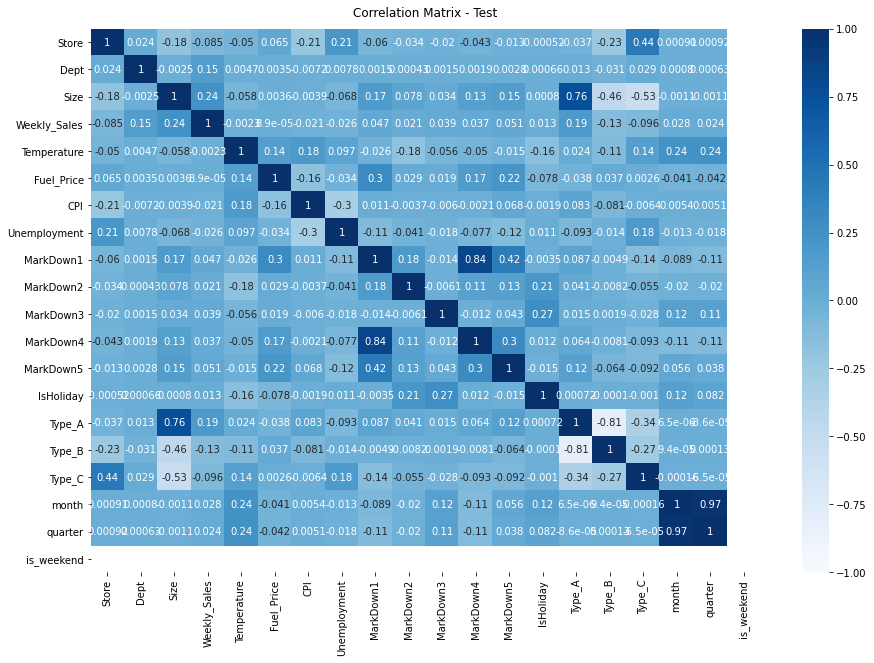

In [47]:
plt.figure(figsize=(15, 10))

# del df['Unnamed: 0']
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True,cmap="Blues",annot_kws={"fontsize":10})
heatmap.set_title('Correlation Matrix - Test', fontdict={'fontsize':12}, pad=12);

In [48]:
# for col in cols:
#     plt.figure()
#     plt.scatter(df[col] , df['Weekly_Sales'])
#     plt.ylabel('weeklySales')
#     plt.xlabel(col)

<ipython-input-63-5709d0a21ba6>:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


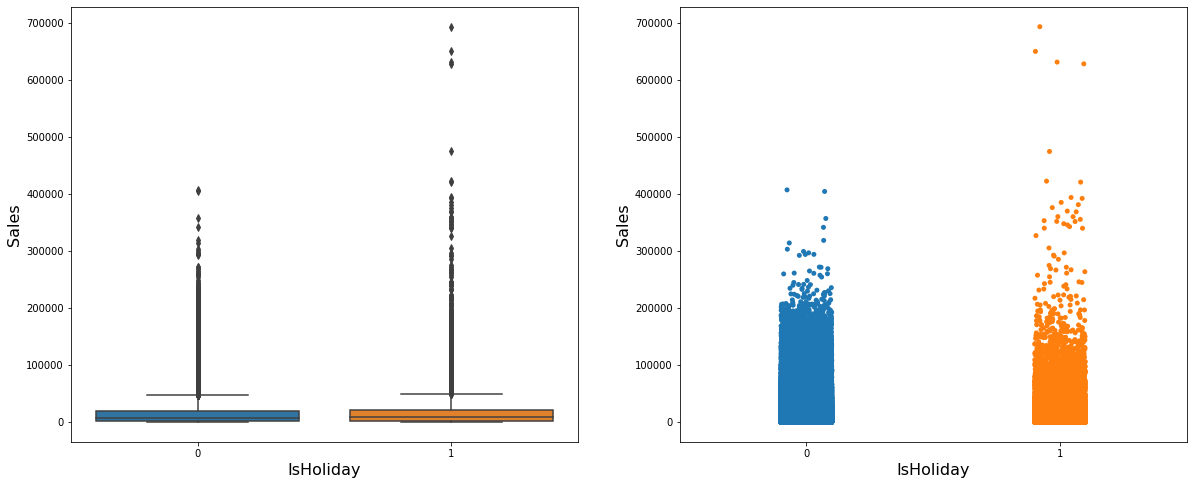

In [63]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(20,8))
gs = GridSpec(1,2)
sns.boxplot(y=df.Weekly_Sales, x=df['IsHoliday'], ax=fig.add_subplot(gs[0,0]))
plt.ylabel('Sales', fontsize=16)
plt.xlabel('IsHoliday', fontsize=16)
sns.stripplot(y=df.Weekly_Sales, x=df['IsHoliday'], ax=fig.add_subplot(gs[0,1]))
plt.ylabel('Sales', fontsize=16)
plt.xlabel('IsHoliday', fontsize=16)
fig.show()

In [64]:
from sklearn.feature_selection import f_regression,mutual_info_regression,SelectKBest
from sklearn.model_selection import train_test_split

X = df.copy()
del X['Weekly_Sales']
Y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
sel_f = SelectKBest(f_regression,k=10).fit(X_train,y_train)
df.columns[sel_f.get_support()]

C:\Users\Checkout\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


IndexError: boolean index did not match indexed array along dimension 0; dimension is 20 but corresponding boolean dimension is 19

Feature: 0, Score: 0.00248
Feature: 1, Score: 0.00433
Feature: 2, Score: 0.00253
Feature: 3, Score: 0.00215
Feature: 4, Score: 0.51678
Feature: 5, Score: 0.43824
Feature: 6, Score: 0.02649
Feature: 7, Score: 0.00262
Feature: 8, Score: 0.00279
Feature: 9, Score: 0.00161


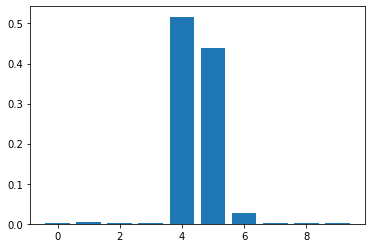

In [65]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [69]:
from sklearn.feature_selection import f_regression,mutual_info_regression,SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = df.drop('Weekly_Sales',axis=1)
y = df['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
sel_f = SelectKBest(f_regression,k=7).fit(X_train,y_train)
X.columns[sel_f.get_support()]

C:\Users\Checkout\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


Index(['Store', 'Dept', 'Size', 'MarkDown5', 'Type_A', 'Type_B', 'Type_C'], dtype='object')